In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from numpy.linalg import inv, det

In [3]:
df=pd.read_csv("/content/diamond.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.shape

(53940, 11)

In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [8]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df = df.drop(['Unnamed: 0'], axis = 1)


In [10]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
features = ['depth','table','price','x','y','z']
for i in features:
  mx=df[i].max()
  mi=df[i].min()


  df[i]=(df[i]-mi)/(mx-mi)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415
1,0.21,Premium,E,SI1,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642
2,0.23,Good,E,VS1,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642
3,0.29,Premium,I,VS2,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704
4,0.31,Good,J,SI2,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,0.494444,0.269231,0.131427,0.535382,0.097793,0.110063
53936,0.72,Good,D,SI1,0.558333,0.230769,0.131427,0.529795,0.097623,0.113522
53937,0.70,Very Good,D,SI1,0.550000,0.326923,0.131427,0.527002,0.096435,0.111950
53938,0.86,Premium,H,SI2,0.500000,0.288462,0.131427,0.572626,0.103905,0.117610


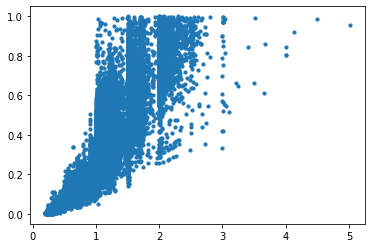

In [12]:
plt.scatter(df['carat'],df['price'],s=10)
plt.show()

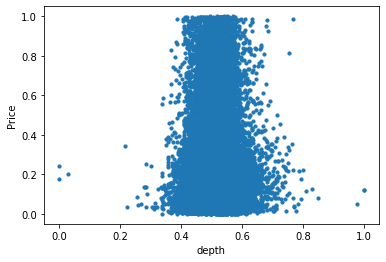

In [13]:
plt.scatter(df['depth'],df['price'],s=10)
plt.xlabel('depth')
plt.ylabel("Price")
plt.show()

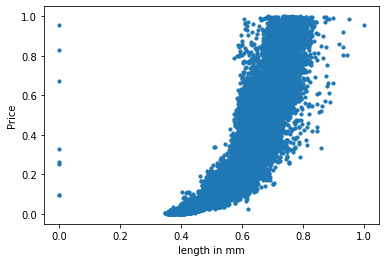

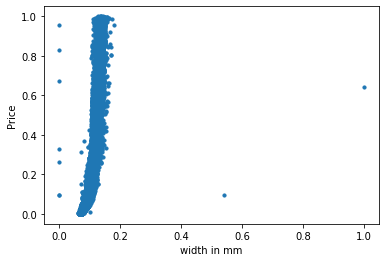

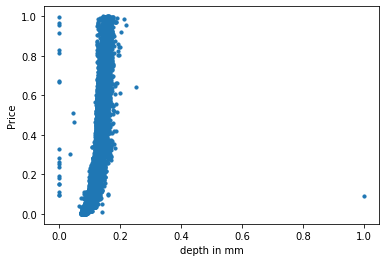

In [14]:
plt.scatter(df['x'],df['price'],s=10)
plt.xlabel('length in mm')
plt.ylabel("Price")
plt.show()

plt.scatter(df['y'],df['price'],s=10)
plt.xlabel('width in mm')
plt.ylabel("Price")
plt.show()

plt.scatter(df['z'],df['price'],s=10)
plt.xlabel('depth in mm')
plt.ylabel("Price")
plt.show()

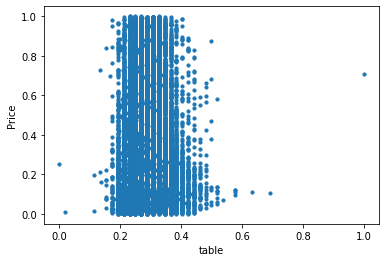

In [15]:
plt.scatter(df['table'],df['price'],s=10)
plt.xlabel('table')
plt.ylabel("Price")
plt.show()

<AxesSubplot:>

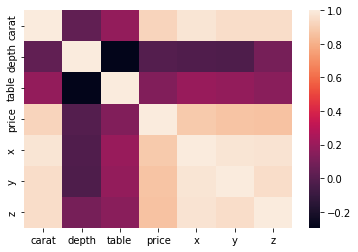

In [16]:
sns.heatmap(df.corr())

In [17]:
df['cut'].value_counts()
df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[0,1,2,3,4],inplace=True)

In [18]:
df['color'].value_counts()
df['color'].replace(['G','E','F', 'H','D','I','J'],[0,1,2,3,4,5,6],inplace=True)

In [19]:
df['clarity'].value_counts()
df['clarity'].replace(['SI1','VS2','SI2', 'VS1','VVS2','VVS1','IF','I1'],[0,1,2,3,4,5,6,7],inplace=True)

In [20]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price      float64
x          float64
y          float64
z          float64
dtype: object

In [21]:
df = df.drop(['table','depth','cut','color','clarity'], axis = 1)

In [22]:
df.head(10)

,carat,price,x,y,z
0,0.23,0.000000,0.367784,0.067572,0.076415
1,0.21,0.000000,0.362197,0.065195,0.072642
2,0.23,0.000054,0.377095,0.069100,0.072642
3,0.29,0.000433,0.391061,0.071817,0.082704
4,0.31,0.000487,0.404097,0.073854,0.086478
5,0.24,0.000541,0.366853,0.067233,0.077987
6,0.24,0.000541,0.367784,0.067572,0.077673
7,0.26,0.000595,0.378957,0.069779,0.079560
8,0.22,0.000595,0.360335,0.064177,0.078302
9,0.23,0.000649,0.372439,0.068761,0.075157


In [23]:
df = df[df['price'] >= 0.04]  

In [24]:
df['price'].value_counts()

0.040763    65
0.040547    59
0.072228    52
0.070174    49
0.060010    48
            ..
0.585987     1
0.585825     1
0.585554     1
0.585446     1
0.487701     1
Name: price, Length: 10881, dtype: int64

In [25]:
df.shape

(38158, 5)

In [26]:
training_size= int(len(df)*0.8)
train_df=df[:training_size]
test_df=df[training_size:]

In [27]:
X_train = train_df.drop(['price'], axis = 1)
X_test = test_df.drop(['price'],axis = 1)
Y_train = train_df['price']
Y_test = test_df['price']

In [28]:
X_train.shape


(30526, 4)

In [29]:
X_test.shape


(7632, 4)

In [30]:
Y_train.shape


(30526,)

In [31]:
Y_test.shape


(7632,)

In [78]:
class ridge_regression_gradient_descent():
   def __init__(self,iter,learning_rate,lamda):
     self.epochs = iter
     self.lr = learning_rate
     self.alpha = lamda
   def fit(self,X_train,Y_Train):
     m,n=X_train.shape
     self.weights = np.random.uniform(0,1,n)
     self.b = 0
     for i in range(1, self.epochs+1):
       y_pred = X_train.dot(self.weights) + self.b
       mse = np.mean((Y_Train - y_pred)**2)
       cost = self.alpha * np.sum(self.weights**2)+mse
       diff = y_pred - Y_train
       a=((1/m) * np.dot(X_train.T, (y_pred - Y_train)))
       dw = a+(self.alpha*2*self.weights)
       db = np.mean(diff)
       self.weights = self.weights - self.lr * dw
       self.b = self.b - self.lr * db
   def predict(self,X_test):
     y_pred = np.dot(X_test, self.weights)+self.b
     return y_pred
ridge = ridge_regression_gradient_descent(iter=10000,learning_rate=0.01,lamda=0.1)
import time
start_time= time.time()
ridge.fit(X_train, Y_train)
end_time = time.time()
print("Time to train:", end_time - start_time)
y_test_pred = ridge.predict(X_test)
print(y_test_pred)

Time to train: 25.453736782073975
[0.19510619 0.18606293 0.18614009 ... 0.22296174 0.26019996 0.23467578]


1) As you can see below the training and testing errors have a negligble difference indicating the model isn't overfitting



2) For the validation set/ test set, the mean squared error has reduced to 0.012 now


3) Both OLS and Gradient Descent are used for optimizing the weights(coefficients) and intercept(bias) in linear regression problems. We can see that the gradient descent performs better in comparison to the OLS since it is iterative. OLS finds the minima using partial derivative.


4) OLS is generally said to be computationally effective when the size of the dataset is relatively small(training size <= 10**4). For larger datasets, Gradient Descent is said to perform better. Here, we have training size >= 30,000. Hence, Gradient Descent turned out to be a better option


In [79]:
#Training errors
y_train_pred = ridge.predict(X_train)
print(y_train_pred)
mse = np.mean((Y_train - y_train_pred)**2)
print("Mean squared error:", mse)

[0.2231216  0.26130988 0.22309685 ... 0.17645628 0.17907732 0.18132371]
Mean squared error: 0.020776271934353933


In [80]:
#Testing errors
mse = np.mean((Y_test - y_test_pred)**2)
print("Mean squared error:", mse)

Mean squared error: 0.01280237548088802


In [63]:
weights = ridge.weights
import pickle
with open('gradient_descent.pkl', 'wb') as f:
  pickle.dump(weights, f)
from google.colab import files
files.download('gradient_descent.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

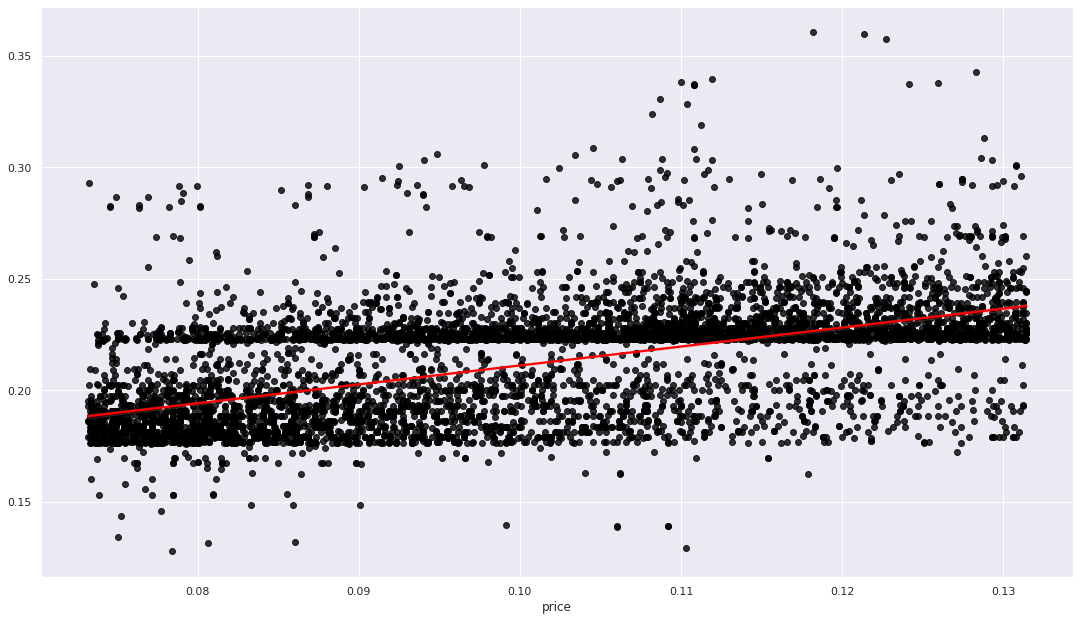

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.set_theme(color_codes=True)
sns.regplot(Y_test,y_test_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [81]:
#Regularization classes
class ElasticNetRegression():
   def __init__(self, l_ratio,lamda, lr, iter):
     self.iter = iter
     self.lr = lr
     self.lamda = lamda
     self.l_ratio = l_ratio
     self.b=0
   def fit(self,X_train,Y_Train):
    #  X_train = np.insert(X_train, 0, 1, axis=1)
     m,n=X_train.shape
     self.weights=np.random.uniform(0,1,n)
     for i in range(1, self.iter+1):
       y_pred = np.dot(X_train,self.weights)+self.b
       diff = y_pred-Y_train
       cost = (1 / (2*m)) * np.sum(np.square(y_pred-Y_Train)) + self.regularization(self.weights)
       dw= ((1/m) * np.dot(X_train.T, (y_pred - Y_train)))+(self.lamda * self.l_ratio * np.sign(self.weights))+(
           self.lamda * (1 - self.l_ratio) * 2* self.weights)
       db = np.mean(diff)
       self.weights = self.weights - self.lr * dw
       self.b = self.b - self.lr * db
   def regularization(self,w):
     l1,l2 = self.l_ratio*self.lamda*np.sum(np.abs(w)),(1-self.l_ratio)*self.lamda*0.5*np.sum(np.square(w))
     return l1+l2
   def predict(self,x_test):
    #  X_test = np.insert(x_test, 0 , 1, axis= 1)
     y_pred = np.dot(X_test, self.weights)+self.b
     return y_pred


In [82]:
elastic = ElasticNetRegression(l_ratio=0.5,lamda=0.1,lr=0.1,iter=10000)
elastic.fit(X_train, Y_train)
y_pred = elastic.predict(X_test)
print(y_pred)

[0.24022833 0.23490287 0.23489288 ... 0.25613035 0.27729962 0.26274301]


1)Elastic net regression has performed better in comparison to the ridge regression since it significantly it reduced the mean squared error

2) Elastic net is a regularization method which uses both L1(Lasso) and L2(Ridge) penalty. 

3) From the correlation matrix above, we can see that the features are highly correlated. Elastic Net is said to perform better when you have a large dataset with highly correlated features.



In [83]:
mse = np.mean((Y_test - y_pred)**2)
print("Mean squared error:", mse)

Mean squared error: 0.0225673071643505


<AxesSubplot:xlabel='price'>

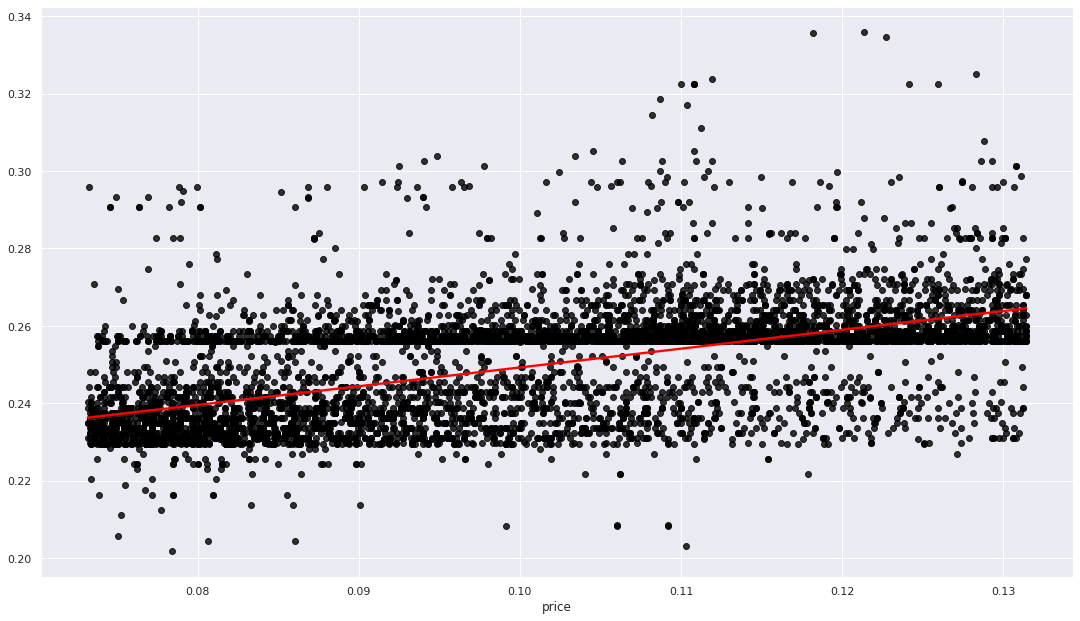

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
sns.set_theme(color_codes=True)
sns.regplot(Y_test,y_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

On comparin

In [53]:
mse = np.mean((Y_test - y_pred)**2)
print("Mean squared error:", mse)

Mean squared error: 0.012802390190207175


In [65]:
weights = elastic.weights
import pickle
with open('elastic_net.pkl', 'wb') as f:
  pickle.dump(weights, f)
from google.colab import files
files.download('elastic_net.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>